# **EM Algorithm**

In [248]:
# importing the required libraries
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [249]:
# loading the iris dataset
iris = datasets.load_iris()

In [250]:
# converting the data into DataFrame object
X = pd.DataFrame(iris.data)
# assigning the column names
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
X.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [251]:
# getting the target column
y = pd.DataFrame(iris.target)
# assigning the name to the target column
y.columns = ['Targets']
y['Targets'].unique()

array([0, 1, 2])

In [252]:
# creating an instance of K Means clustering class
model = KMeans(n_clusters=3,random_state=42)
# fitting our data
model.fit(X)

KMeans(n_clusters=3, random_state=42)

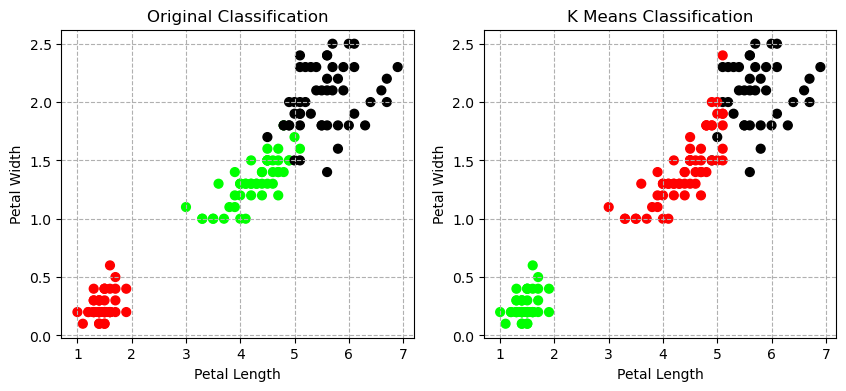

In [253]:
plt.figure(figsize=(10,4))
colormap = np.array(['red', 'lime', 'black'])
# Plotting the original classes 
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Original Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.grid(linestyle='--')


# Plotting the predicted classes from k means
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Means Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.grid(linestyle='--')
plt.show()


In [254]:
# converting the target column to numpy array
y = np.array(y)
# flattening the array
y = y.reshape(-1)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [255]:
# labels that our model has predicted
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [256]:
print('The accuracy score of K-Mean: ',adjusted_rand_score(y, model.labels_))

The accuracy score of K-Mean:  0.7302382722834697


In [257]:
# performing standard scaling on the predictors
scaler = StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
# creating an instance of gaussian mixture 
gmm = GaussianMixture(n_components=3,random_state=42)
# fitting the data into our model
gmm.fit(xs)
# predicting the outputs
y_gmm = gmm.predict(xs)

In [258]:
# predicted classes from our gaussian mixture model
y_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

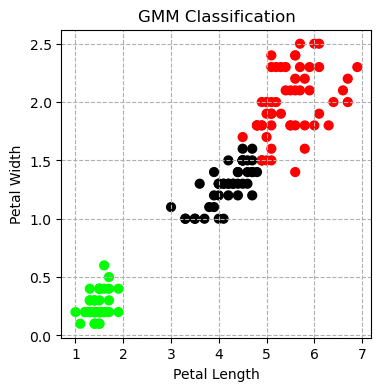

In [259]:
# plotting the scatter plot for the predicted samples for gaussian mixture model
plt.figure(figsize=(4,4))
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_gmm], s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.grid(linestyle='--')
plt.show()

In [260]:
# adjusted rand score 
print('The accuracy score of EM: ',adjusted_rand_score(y, y_gmm))

The accuracy score of EM:  0.9038742317748124
